### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Heart Disease Prediction</div></b>

### Project Overview
The aim of this project is to build a machine-learning model that can predict the likelihood of a person having a heart disease or not based on some features.

#### Import Required Libraries

In [3]:
# For data analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the cleaned dataset

data = pd.read_csv('cleaned_heart.csv')

data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Feature Engineering

In [6]:
# Instantiate the dependent and independent variable
df = data[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']]

label = data[['target']]

In [7]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [8]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [9]:
# Dealing with Outliers in'resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heart_rate_achieved' as seen from our EDA

# Normalize the data
scaler = MinMaxScaler()

df["Scaled_RBP"] = scaler.fit_transform(df[['resting_blood_pressure']].values.reshape(-1, 1))
df["Scaled_chol"] = scaler.fit_transform(df[['cholesterol']].values.reshape(-1, 1))
df["Scaled_thal"] = scaler.fit_transform(df[['thalassemia']].values.reshape(-1, 1))
df["Scaled_max_heart_rate_achieved"] = scaler.fit_transform(df[['max_heart_rate_achieved']].values.reshape(-1, 1))

# Dropping the original feature and leaving the scaled ones
df.drop(['resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heart_rate_achieved'], axis=1, inplace=True)

df.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate_achieved
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


In [10]:
# Check shape of the dependent and independent variable

print(df.shape)
print(label.shape)


(302, 13)
(302, 1)


### Model Building

In [12]:
# Split the dataset into training and testing sets - X = Questions, y = Answers

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)

(241, 13)
(241, 1)


In [14]:
print(X_test.shape)
print(y_test.shape)

(61, 13)
(61, 1)


- #### Logistic Regression

In [26]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train) # Machine learning

ly_pred = logreg.predict(X_test) # Machine learning

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1_score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))


Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1_score: 0.870967741935484
AUC-ROC: 0.8701508620689655


In [28]:
X_test

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate_achieved
179,55,1,0,0,1,1,1.2,1,1,0.358491,0.518265,1.000000,0.465649
228,64,1,2,0,1,1,1.8,1,0,0.292453,0.417808,1.000000,0.458015
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626
246,66,1,1,0,1,1,0.0,1,3,0.622642,0.273973,0.333333,0.374046
60,71,0,2,1,0,0,0.0,2,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,51,1,0,0,1,1,4.2,1,3,0.433962,0.392694,1.000000,0.389313
104,50,1,2,0,1,0,0.0,2,0,0.330189,0.159817,0.666667,0.702290
299,68,1,0,1,1,0,3.4,1,2,0.471698,0.152968,1.000000,0.534351
193,60,1,2,0,0,0,3.0,1,0,0.433962,0.134703,0.666667,0.641221


In [30]:
ly_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [32]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
299,0
193,0


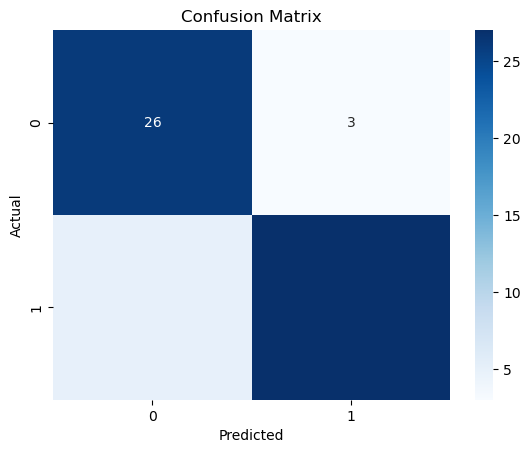

array([[26,  3],
       [ 5, 27]], dtype=int64)

In [34]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

lcm

- #### Random Forest Classifier

In [39]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1_score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))


Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1_score: 0.870967741935484
AUC-ROC: 0.8701508620689655


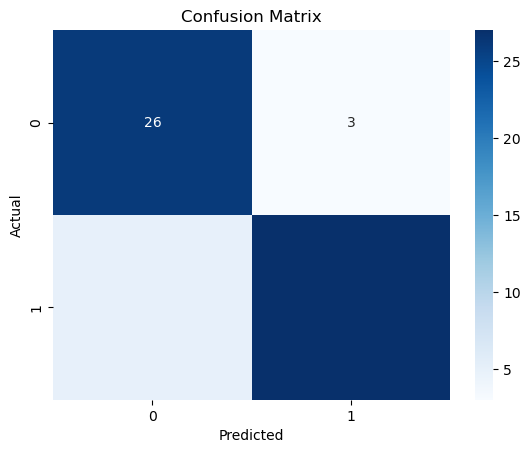

array([[26,  3],
       [ 5, 27]], dtype=int64)

In [41]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

rcm

In [43]:
# 7 Machine Learning Algorithm will be applied to the dataset

classifiers = [[RandomForestClassifier(), 'Random Forest'],
              [KNeighborsClassifier(), 'K-Nearest Neighbors'],
              [SGDClassifier(), 'SGD Classifier'],
              [SVC(), 'SVC'],
              [GaussianNB(), 'Naive_Bayes'],
              [DecisionTreeClassifier(random_state = 42), "Decision Tree"],
              [LogisticRegression(), 'LogisticRegression']
             ]

In [45]:
classifiers[0][1]

'Random Forest'

In [47]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
# Converting into a percentage
    acc_list[model_name] = ([str(round(a_score*100, 2))  + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifier[-1][1]:
        print('')

In [49]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()


Accuracy Score


,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive_Bayes,Decision Tree,LogisticRegression
0,85.25%,78.69%,91.8%,72.13%,88.52%,78.69%,86.89%


In [51]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()


Precision


,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive_Bayes,Decision Tree,LogisticRegression
0,87.1%,85.19%,96.55%,71.43%,93.1%,85.19%,90.0%


In [53]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive_Bayes,Decision Tree,LogisticRegression
0,84.38%,71.88%,87.5%,78.12%,84.38%,71.88%,84.38%


In [55]:
print("ROC Call")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Call


,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive_Bayes,Decision Tree,LogisticRegression
0,85.29%,79.04%,92.03%,71.82%,88.74%,79.04%,87.02%


### Conclusion
Based on our analysis, doctors and hospital nurses aim to minimize the number of individuals who are predicted to have heart disease but do not have it. Misdiagnosing healthy patients as having heart disease could result in unnecessary and potentially harmful treatments. Therefore, it is crucial to focus on the precision metric to evaluate the accuracy of predictions and reduce the risk of incorrect diagnoses.